<a href="https://colab.research.google.com/github/Orley74/Przetwarzanie_jezyka_naturalnego/blob/main/NLP_zad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing z wykorzystaniem nltk i spacy

In [1]:
!python -m spacy download pl_core_news_sm
#https://colab.research.google.com/drive/1bPMGdZ5fEFNLMg21x0DTHtihOzp6i6-Q?usp=sharing

2024-01-15 17:54:02.372661: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 17:54:02.372726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 17:54:02.385388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 17:54:02.403582: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 17:54:06.736461: W tensorflow/compiler/tf2

In [2]:

import requests
import urllib.request

import spacy
from collections import Counter
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


list_of_books = {
    'Silaczka': 'https://wolnelektury.pl/media/book/txt/silaczka.txt',
    'Syzyfowe prace': 'https://wolnelektury.pl/media/book/txt/syzyfowe-prace.txt',
    'Przedwiosnie': 'https://wolnelektury.pl/media/book/txt/przedwiosnie.txt',
    'Wierna rzeka': 'https://wolnelektury.pl/media/book/txt/wierna-rzeka.txt'
}

books = []
for book in list_of_books:
  r = requests.get(list_of_books[book])
  books.append(r.text)

In [3]:
nlp = spacy.load("pl_core_news_sm")


#### Preprocessing and frequency analysis



# 1. Przeprowadz lematyzację  tekstu, pzostawiając formy podstawowe  wszystkich  tokenów będących  rzeczownikami (NOUN)  lub  czasownikami (VERB)

books_lematized = []

for book in books:
    lematized_book = nlp(book)
    words = [token.lemma_ for token in lematized_book if token.pos_ in ['NOUN', 'VERB']]
    books_lematized.append(' '.join(words))

print(books_lematized)


# 2. Wykorzystaj TfidfVectorizer do zbudowania macierzy tfidf
vectorizer = TfidfVectorizer( )
tfidf_matrix = vectorizer.fit_transform(books_lematized)


# 3. Oblicz podobienstwo pomiedzy dokumentami, a nastepnie wskaz dwa najbardziej podobne i dwa najbardziej odlegle dokumenty:

similarity_matrix = cosine_similarity(tfidf_matrix)

similar = np.unravel_index(np.argsort(similarity_matrix - np.eye(similarity_matrix.shape[0]), axis=None)[-2:], similarity_matrix.shape)
distant = np.unravel_index(np.argsort(similarity_matrix + np.eye(similarity_matrix.shape[0]), axis=None)[:2], similarity_matrix.shape)

print(f"2 Najbardziej podobne do siebie dokumenty to: {similar[1]} z wartoscia {similarity_matrix[similar][0]}\n")

print(f"2 Najbardziej oddalone od siebie dokumenty to: {distant[0]} z wartoscia {similarity_matrix[distant][0]}")

###############################################################################################################

['siłaczka humor powrócić dom doktor wint pośrednictwo składać życzenie księdz pleban aptekarz poczciarz sędzia ciąg godzina rząd Powróciwszy drzwi gabinet zamknąć wyłączać gospodynia wedrzeć móc usiąść stolik wpatrywać upor okno powód zająć palec stół czuć opanowywać zaczynać metafizyk Wiadomą rzecz człowiek kultura pęd niedostatek ognisko życie doktor obrzydłówka podlegać upływ czas brak środek komunikacja niemożność mówić ciąg sezon przeistaczać twór ilość butelka piwo atak nuda stan graniczyć usposobieć wymioty nudę połykać zając połyk jajka tasiemc trawa pies chwila zagnieżdżć organizma bąblowca być zaczynać proces umierać doktor epoka życie mówić mózg serce energia kinetyczna doświadczać wstręt czytać pisać rachowanie móc godzina spacerować gabinet leżeć szezlong papieros ząb oczekiwać stać musieć musieć nadejść mówić przewracać wsłuchiwaniu szmera szelest przerwanie cisza dławić przygniatać ziemia dokuczać jesień cisza popołudnie Obrzydłówka przedmieście przedmieście poduszczać 

Zadania powyżej progu zaliczenia

In [4]:
# 4.  W każdym dokumencie znajdź 5 najczęściej występujących  słów kluczowych wraz z ich wagą.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(books_lematized)
names = vectorizer.get_feature_names_out()

i=1

for doc in X:
  frequencies = doc.toarray().sum(axis=0)
  word_freq_df = pd.DataFrame({'Word': names, 'Frequency': frequencies})

  word_freq_df_sorted = word_freq_df.sort_values(by='Frequency', ascending=False)

  top_words = word_freq_df_sorted.head(5)
  print(f"Najczesciej wystepujace slowa z dokumentu: {i}")
  print(top_words)
  i+=1


Najczesciej wystepujace slowa z dokumentu: 1
         Word  Frequency
1652   doktor         66
766       być         30
5029     mieć         27
1294     czas         19
15591  zacząć         19
Najczesciej wystepujace slowa z dokumentu: 2
       Word  Frequency
7308    pan        306
766     być        286
5029   mieć        282
6753    oko        201
3701  klasa        197
Najczesciej wystepujace slowa z dokumentu: 3
       Word  Frequency
766     być        558
5029   mieć        361
7308    pan        263
5297    móc        256
10955  ręka        212
Najczesciej wystepujace slowa z dokumentu: 4
       Word  Frequency
766     być        257
6753    oko        167
5029   mieć        166
7308    pan        126
10955  ręka        124


[[0.         0.54056252 0.48836387 0.48948008]
 [0.54056252 0.         0.22526693 0.29666058]
 [0.48836387 0.22526693 0.         0.15959079]
 [0.48948008 0.29666058 0.15959079 0.        ]]
[[ 0.59718094  0.00125684]
 [-0.1961799   0.24626747]
 [-0.21987315 -0.07042444]
 [-0.18112789 -0.17709987]]


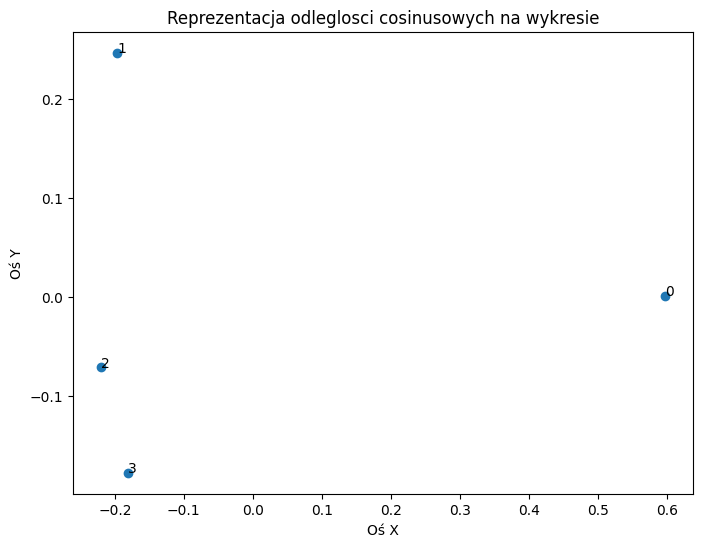

In [10]:
#TODO:
# Przy pomocy PCA zwizualizuja polozenie 10 artykułów

from sklearn.metrics.pairwise import pairwise_distances
cosine_distances = pairwise_distances(tfidf_matrix, metric='cosine')
print(cosine_distances)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

books_reduced = pca.fit_transform(cosine_distances)

print(books_reduced)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(books_reduced[:, 0], books_reduced[:, 1], marker='o')

for index in range(4):
    plt.annotate(index, (books_reduced[index, 0], books_reduced[index, 1]))

plt.title('Reprezentacja odleglosci cosinusowych na wykresie')
plt.xlabel('Oś X')
plt.ylabel('Oś Y')
plt.show()